CPU average threshold

Image downloading ...
Saving ... [https://images.pexels.com/photos/842711/pexels-photo-842711.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940] => [temp_000.png]
Saving ... [http://3.bp.blogspot.com/-eilZTdgbWPA/XFUltCS4Z1I/AAAAAAAABz0/feDxTa3Emtsb3Wx4xxu0hWnFrohqtwQfwCKgBGAs/w0/mountain-lake-scenery-nature-cottage-25-4K.jpg] => [temp_001.png]
Saving ... [http://images.pexels.com/photos/1379636/pexels-photo-1379636.jpeg?cs=srgb&dl=pexels-irina-iriser-1379636.jpg&fm=jpg] => [temp_002.png]
Saving ... [http://images.pexels.com/photos/853199/pexels-photo-853199.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940] => [temp_003.png]

Thresholding temp_000.png
Thresholding temp_001.png
Thresholding temp_002.png
Thresholding temp_003.png

Elapsed time = 0.1120 seconds.


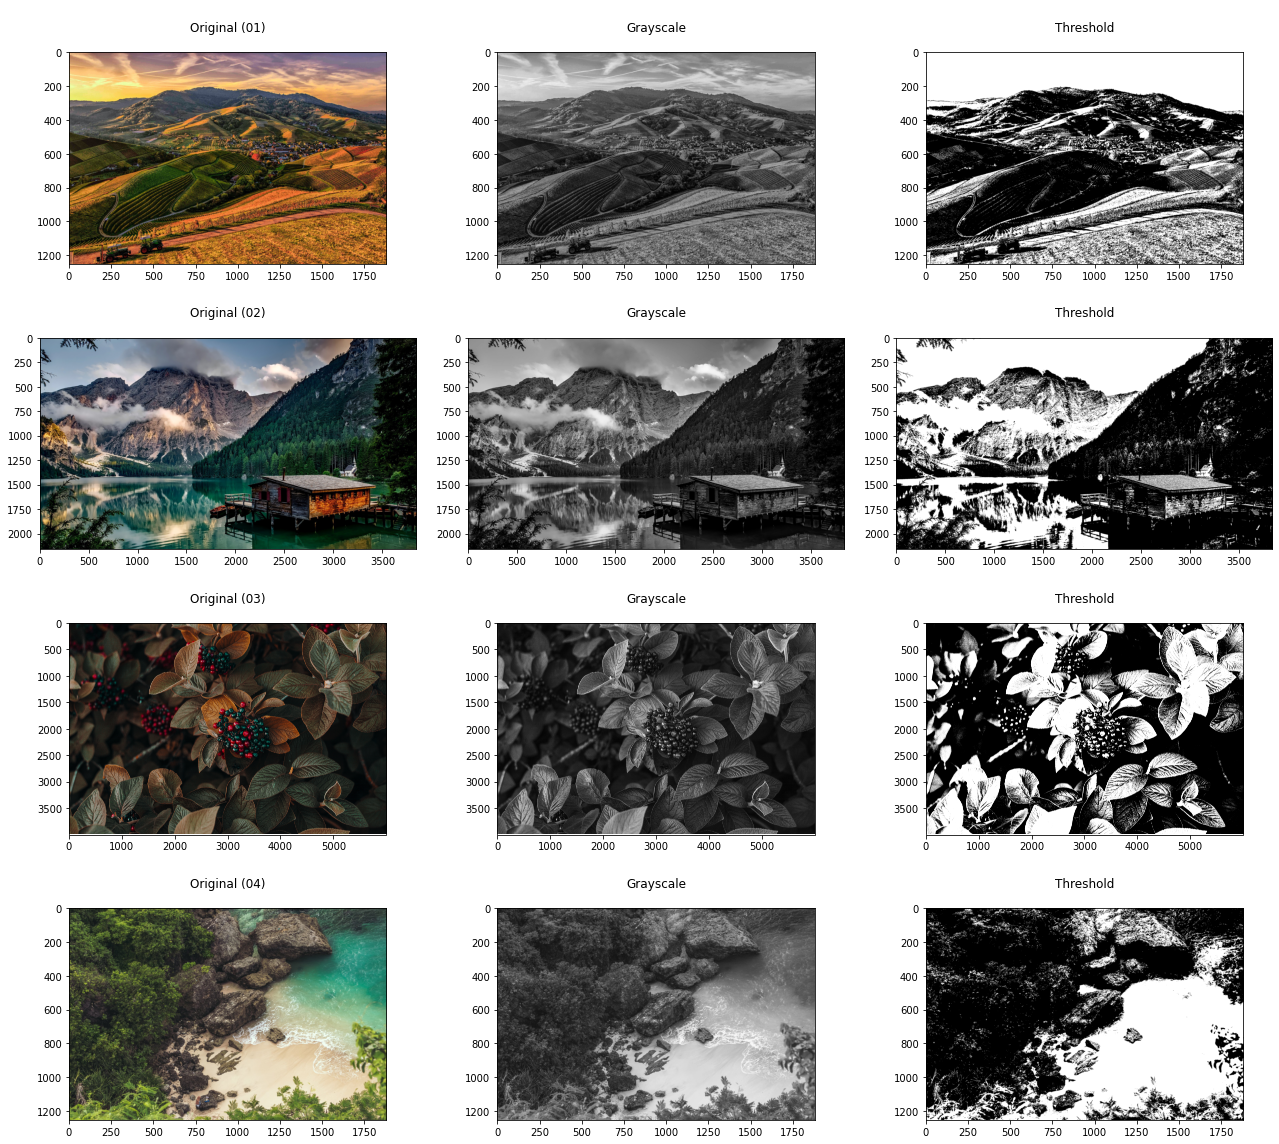

In [17]:
# CPU 평균임계치 연산
from IPython.display import clear_output
clear_output()

import numpy as np
from matplotlib import pyplot as plt
from skimage import io
from time import *
from time import perf_counter

print( "CPU average threshold" )

img_names = []
img_names.append( 'https://images.pexels.com/photos/842711/pexels-photo-842711.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940' )
img_names.append( 'http://3.bp.blogspot.com/-eilZTdgbWPA/XFUltCS4Z1I/AAAAAAAABz0/feDxTa3Emtsb3Wx4xxu0hWnFrohqtwQfwCKgBGAs/w0/mountain-lake-scenery-nature-cottage-25-4K.jpg' )
img_names.append ( 'http://images.pexels.com/photos/1379636/pexels-photo-1379636.jpeg?cs=srgb&dl=pexels-irina-iriser-1379636.jpg&fm=jpg' )
img_names.append( 'http://images.pexels.com/photos/853199/pexels-photo-853199.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940' )

# file download from a url
print( f"\nImage downloading ..." )

f_names = []
for i, img_name in enumerate( img_names ) :
    import urllib.request

    opener = urllib.request.build_opener()
    opener.addheaders = [ ('User-Agent', 'MyApp/1.0') ]
    urllib.request.install_opener(opener)
    f_name = f"temp_{i:03d}.png"

    print( f"Saving ... [{img_name}] => [{f_name}]" )
    urllib.request.urlretrieve( img_name, f_name )

    f_names.append( f_name )
pass

row_cnt = len( img_names ); col_cnt = 3;
fig, charts = plt.subplots( row_cnt, col_cnt, figsize=(6*col_cnt, 4*row_cnt) )
charts = charts.flatten() if row_cnt*col_cnt >= 2 else [ charts ]
idx = 0

print()

elapsed_time = 0 

for i, f_name in enumerate( f_names ) :
    print( f"Thresholding {f_name}" )

    img = io.imread( f_name ) 
    
    then = perf_counter()

    img_color = img

    # 회색조 변환
    gray = img[:,:,0]/3 + img[:,:,1]/3 + img[:,:,2]/3 
    img = gray

    # 평균값 구하기 
    avg = np.average( img )

    # 평균값 임계치 적용
    thresh = np.where( img < avg, 0 , 1 )
    
    elapsed_time += perf_counter() - then

    chart = charts[idx]
    chart.imshow( img_color )
    chart.set_title( f'\nOriginal ({i+1:02d})\n' )
    idx += 1

    chart = charts[idx]
    chart.imshow( gray, cmap='gray' )
    chart.set_title( '\nGrayscale\n' )
    idx += 1

    chart = charts[idx]
    chart.imshow( thresh, cmap='gray' )
    chart.set_title( '\nThreshold\n' )
    idx += 1
pass

elapsed = perf_counter() - then

print( f"\nElapsed time = {elapsed:.4f} seconds." )

plt.tight_layout(); plt.show()